# Importing Liberies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data Over-view

### Reading the data

In [2]:
df = pd.read_csv("Loan payments data.csv")

### Data Preview

In [3]:
print("preview of Data")
df.head()

preview of Data


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


**Shape of data:**

In [4]:
print("Shape of data")
df.shape

Shape of data


(500, 11)

**List of Columns:**

In [5]:
print("List of data column")
df.columns

List of data column


Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

**Statistical summary of numerical columns**

In [6]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


**Data info**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


### **Data Cleaning**

**check and removal of missing values**

In [8]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [9]:
 df['past_due_days']= df['past_due_days'].fillna( df['past_due_days'].mean())

**drop missing values**

In [10]:
df = df.dropna()

In [11]:
df.shape

(400, 11)

**Duplicate check**

In [12]:
print('counting duplicates')
len(df) - len(df.drop_duplicates())

counting duplicates


0

### **EDA**

**Education and loan status**

In [13]:
df.replace({"loan_status":{'COLLECTION_PAIDOFF':0, 'PAIDOFF':1}}, inplace=True)

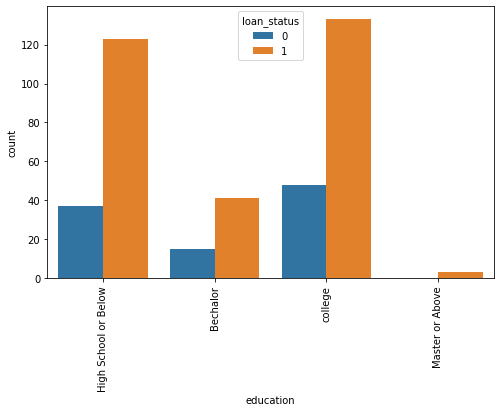

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='education', hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

**Gender and loan_status**

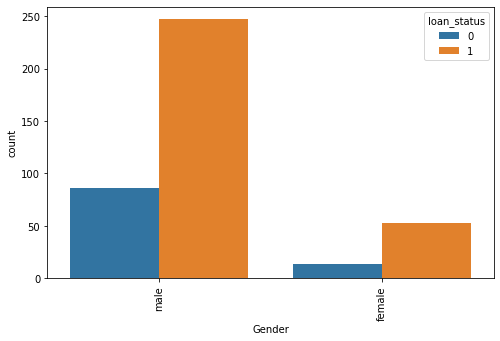

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

**Label Encoding**

In [16]:
df.groupby(['education'])['effective_date'].count()

education
Bechalor                 56
High School or Below    160
Master or Above           3
college                 181
Name: effective_date, dtype: int64

In [17]:
df.replace({"Gender":{'female':0, 'male':1}}, inplace=True)
df.replace({"education":{'Bechalor':0, 'High School or Below':1, 'Master or Above':2, 'college':3}}, inplace=True)

In [18]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,1,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,36.01,45,1,1
1,xqd20168902,1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,36.01,50,0,0
2,xqd20160003,1,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,36.01,33,0,0
3,xqd20160004,1,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,36.01,27,3,1
4,xqd20160005,1,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,36.01,28,3,0


In [19]:
#Seperating the data and the label
x=df.drop(['Loan_ID', 'effective_date', 'due_date','paid_off_time', 'loan_status'], axis =1)
y=df['loan_status']

In [20]:
print(x)
print(y)

     Principal  terms  past_due_days  age  education  Gender
0         1000     30          36.01   45          1       1
1         1000     30          36.01   50          0       0
2         1000     30          36.01   33          0       0
3         1000     15          36.01   27          3       1
4         1000     30          36.01   28          3       0
..         ...    ...            ...  ...        ...     ...
495       1000     30           3.00   28          1       1
496       1000     15          14.00   26          1       1
497        800     15           3.00   30          3       1
498       1000     30           1.00   38          3       0
499       1000     30           8.00   28          1       1

[400 rows x 6 columns]
0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: loan_status, Length: 400, dtype: int64


**Spliting the data to training and test data**

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1,stratify=y, random_state=2)

In [22]:
print(x_train.shape, x_test.shape, x.shape)

(360, 6) (40, 6) (400, 6)


**Training the model: support vector machine(SVM)**

In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

**Model Evaluation**

In [25]:
# training the data accuracy
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy score:',training_data_accuracy)

Accuracy score: 0.9861111111111112


In [27]:
# testing the data accuracy
x_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy score:',testing_data_accuracy)

Accuracy score: 0.975


**Building a predictive system**

In [28]:
input_data = (1000,30,3.00,28,1,1)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape thenumpy array as we are predicting for one instance I.e one datapoint
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshape)
print('The result is:',prediction)

if (prediction == 0):
    print('loan approved')
else:
    print('loan failed')

The result is: [0]
loan approved


In [ ]:
input_data = input()

updated_input = type.str(input_data)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape thenumpy array as we are predicting for one instance I.e one datapoint
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshape)
print('The result is:',prediction)